In [1]:
import pandas as pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
home_data = pandas.read_csv("train.csv")
print(home_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [2]:
avg_lot_size = home_data["LotArea"].mean()

In [3]:

current_years = home_data["YrSold"] - home_data["YearBuilt"]
newest_home_age = current_years.max()
oldest_home_age = current_years.min()


--- 1. Chargement des données ---
Dimensions du dataset : (1460, 81)

--- 2. Génération des graphiques... ---


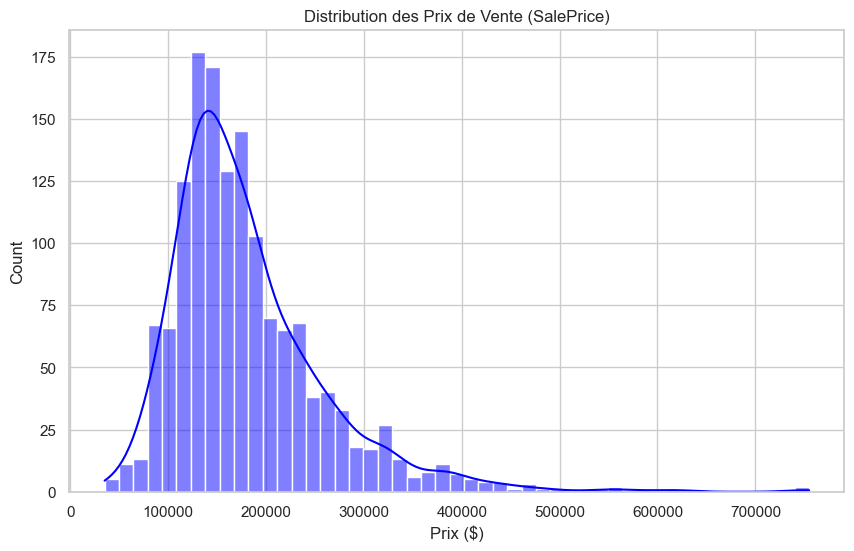

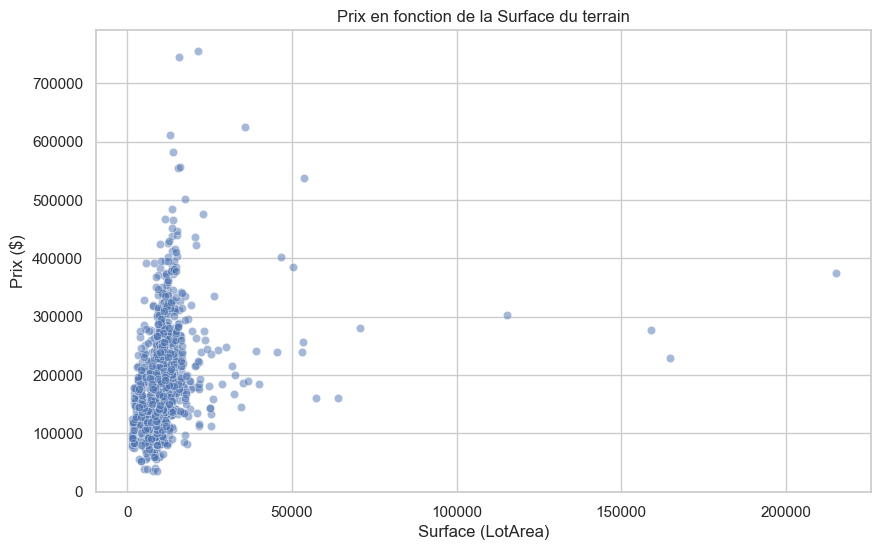


--- 3. Préparation du modèle ---
Données séparées avec succès.

--- 4. Entraînement du modèle (Decision Tree) ---
Modèle entraîné !

--- 5. Évaluation ---
Moyenne des erreurs de prédiction (MAE) : 29,653 dollars
Cela signifie qu'en moyenne, notre modèle se trompe de ce montant.


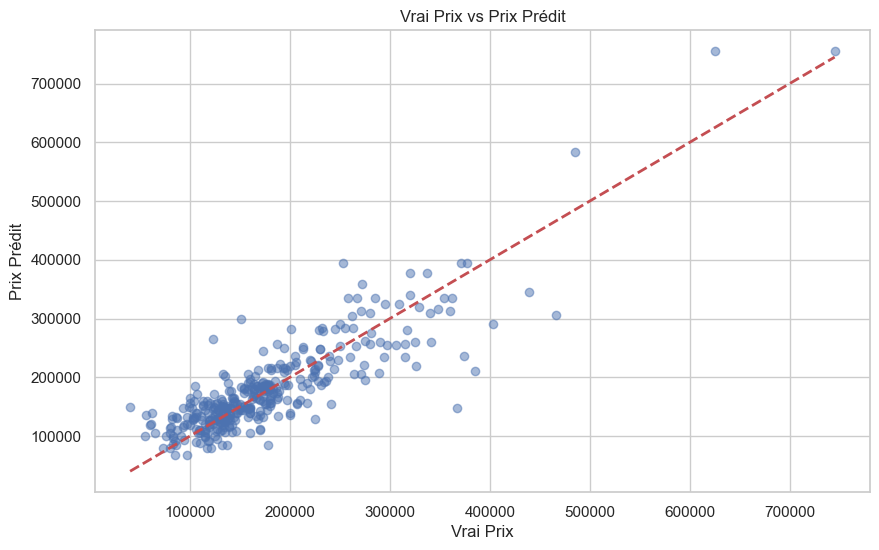

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# ==========================================
# 1. CHARGEMENT DES DONNÉES
# ==========================================
print("--- 1. Chargement des données ---")
file_path = 'train.csv'
home_data = pd.read_csv(file_path)
print(f"Dimensions du dataset : {home_data.shape}") # (Lignes, Colonnes)

# ==========================================
# 2. EXPLORATION & VISUALISATION (DATA VIZ)
# ==========================================
print("\n--- 2. Génération des graphiques... ---")

# Configurer le style des graphiques
sns.set_theme(style="whitegrid")

# Graphique A : La Cible (Ce qu'on veut prédire)
# On veut voir la répartition des prix des maisons
plt.figure(figsize=(10, 6))
sns.histplot(home_data['SalePrice'], kde=True, color='blue')
plt.title('Distribution des Prix de Vente (SalePrice)')
plt.xlabel('Prix ($)')
plt.show() # Une fenêtre va s'ouvrir

# Graphique B : Relation Surface / Prix
# Est-ce que plus c'est grand, plus c'est cher ?
plt.figure(figsize=(10, 6))
sns.scatterplot(x=home_data['LotArea'], y=home_data['SalePrice'], alpha=0.5)
plt.title('Prix en fonction de la Surface du terrain')
plt.xlabel('Surface (LotArea)')
plt.ylabel('Prix ($)')
plt.show()

# ==========================================
# 3. PRÉPARATION DES DONNÉES (FEATURE ENGINEERING)
# ==========================================
print("\n--- 3. Préparation du modèle ---")

# Cible (y) : Ce qu'on doit deviner
y = home_data.SalePrice

# Features (X) : Les indices pour deviner
# Pour l'instant, on ne prend que quelques colonnes numériques pour faire simple
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Séparation : Données d'entraînement vs Données de Test
# On cache 20% des données pour tester le modèle à la fin (comme un examen)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

print("Données séparées avec succès.")

# ==========================================
# 4. CRÉATION ET ENTRAÎNEMENT DU MODÈLE
# ==========================================
print("\n--- 4. Entraînement du modèle (Decision Tree) ---")

# On crée le modèle
# random_state=1 permet d'avoir toujours le même résultat
iowa_model = DecisionTreeRegressor(random_state=1)

# On l'entraîne (Le modèle apprend les liens entre X et y)
iowa_model.fit(train_X, train_y)
print("Modèle entraîné !")

# ==========================================
# 5. PRÉDICTIONS ET ÉVALUATION
# ==========================================
print("\n--- 5. Évaluation ---")

# On fait des prédictions sur les données cachées (val_X)
val_predictions = iowa_model.predict(val_X)

# On compare les prédictions avec la réalité (val_y)
# MAE = Mean Absolute Error (Erreur Moyenne Absolue)
mae = mean_absolute_error(val_y, val_predictions)

print(f"Moyenne des erreurs de prédiction (MAE) : {mae:,.0f} dollars")
print("Cela signifie qu'en moyenne, notre modèle se trompe de ce montant.")

# Visualisation finale : Réalité vs Prédiction
# Si le modèle est parfait, tous les points sont sur la ligne rouge
plt.figure(figsize=(10, 6))
plt.scatter(val_y, val_predictions, alpha=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'r--', lw=2) # Ligne parfaite
plt.xlabel('Vrai Prix')
plt.ylabel('Prix Prédit')
plt.title('Vrai Prix vs Prix Prédit')
plt.show()

--- 1. Chargement des données ---
Dimensions du dataset : (1460, 81)

--- 2. Génération des graphiques... ---


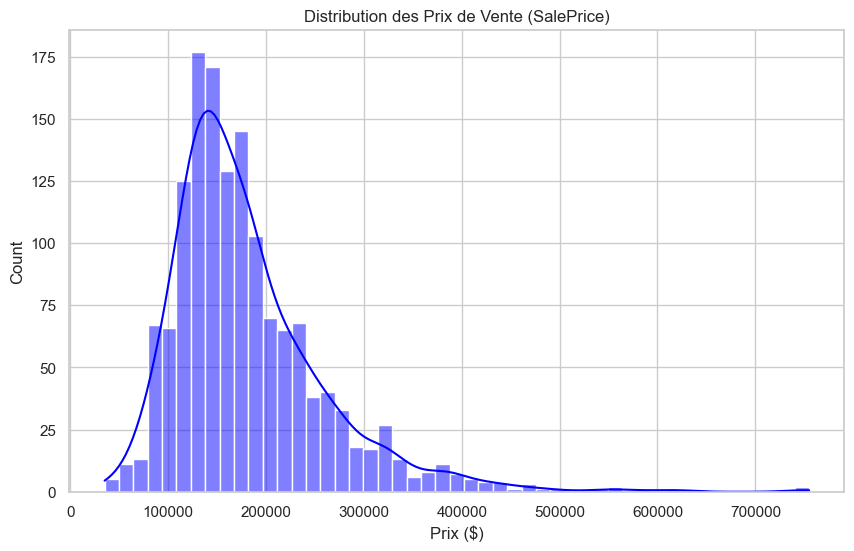

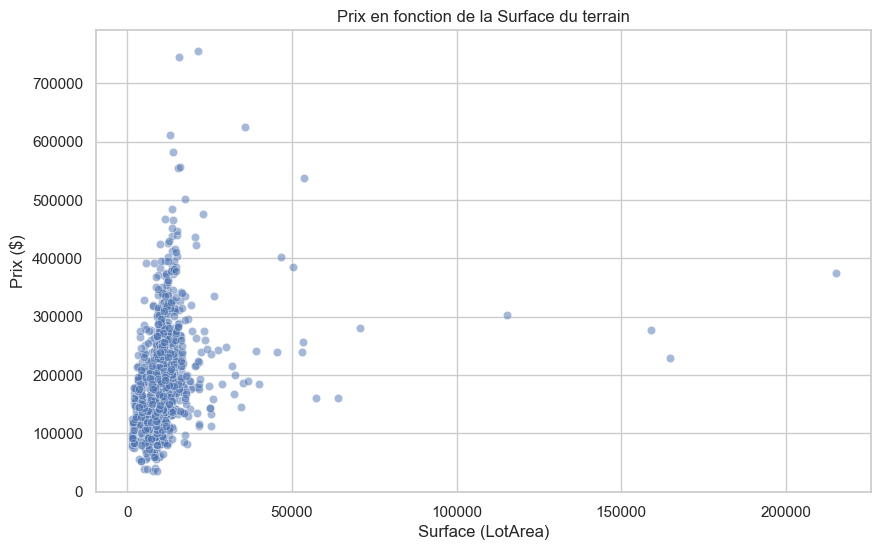


--- 3. Préparation du modèle ---
Données séparées avec succès.
Entraînement sur 1168 maisons.
Validation sur 292 maisons.

--- 4. Entraînement du modèle (Decision Tree) ---
Modèle entraîné !

--- 5. Évaluation ---
Moyenne des erreurs de prédiction (MAE) : 30,643 dollars
Cela signifie qu'en moyenne, notre modèle se trompe de ce montant.


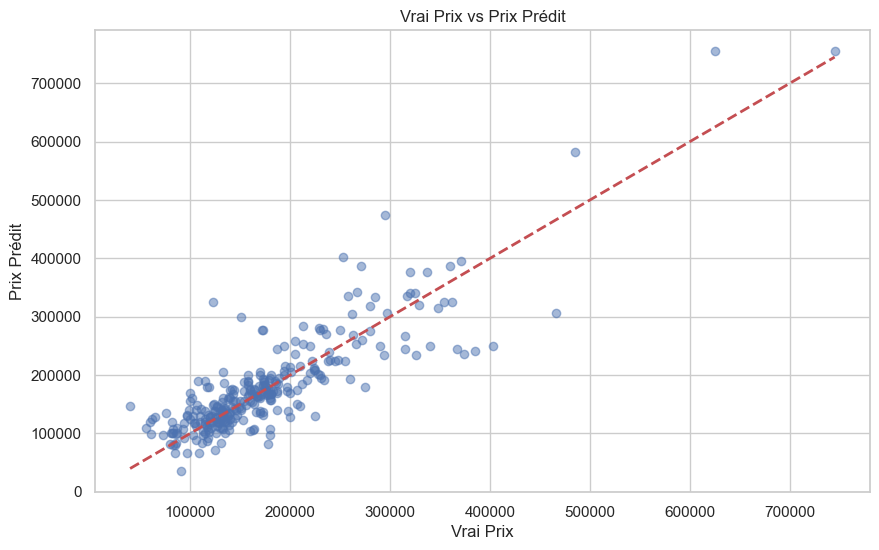

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# ==========================================
# 1. CHARGEMENT DES DONNÉES
# ==========================================
print("--- 1. Chargement des données ---")
file_path = 'train.csv'
home_data = pd.read_csv(file_path)
print(f"Dimensions du dataset : {home_data.shape}") # (Lignes, Colonnes)

# ==========================================
# 2. EXPLORATION & VISUALISATION (DATA VIZ)
# ==========================================
print("\n--- 2. Génération des graphiques... ---")

# Configurer le style des graphiques (plus joli pour GitHub)
sns.set_theme(style="whitegrid")

# Graphique A : La Cible (Ce qu'on veut prédire)
# On veut voir la répartition des prix des maisons
plt.figure(figsize=(10, 6))
sns.histplot(home_data['SalePrice'], kde=True, color='blue')
plt.title('Distribution des Prix de Vente (SalePrice)')
plt.xlabel('Prix ($)')
plt.show() 

# Graphique B : Relation Surface / Prix
# Est-ce que plus c'est grand, plus c'est cher ?
plt.figure(figsize=(10, 6))
sns.scatterplot(x=home_data['LotArea'], y=home_data['SalePrice'], alpha=0.5)
plt.title('Prix en fonction de la Surface du terrain')
plt.xlabel('Surface (LotArea)')
plt.ylabel('Prix ($)')
plt.show()

# ==========================================
# 3. PRÉPARATION DES DONNÉES (FEATURE ENGINEERING)
# ==========================================
print("\n--- 3. Préparation du modèle ---")

# Cible (y) : Ce qu'on doit deviner
y = home_data.SalePrice

# Features (X) : Les indices pour deviner
# Pour l'instant, on ne prend que quelques colonnes numériques pour faire simple
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Séparation : Données d'entraînement vs Données de Validation
# On cache 20% des données pour tester le modèle à la fin (comme un examen)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.2)

print("Données séparées avec succès.")
print(f"Entraînement sur {len(train_X)} maisons.")
print(f"Validation sur {len(val_X)} maisons.")

# ==========================================
# 4. CRÉATION ET ENTRAÎNEMENT DU MODÈLE
# ==========================================
print("\n--- 4. Entraînement du modèle (Decision Tree) ---")

# On crée le modèle
# random_state=1 permet d'avoir toujours le même résultat
iowa_model = DecisionTreeRegressor(random_state=1)

# On l'entraîne (Le modèle apprend les liens entre X et y)
iowa_model.fit(train_X, train_y)
print("Modèle entraîné !")

# ==========================================
# 5. PRÉDICTIONS ET ÉVALUATION
# ==========================================
print("\n--- 5. Évaluation ---")

# On fait des prédictions sur les données cachées (val_X)
val_predictions = iowa_model.predict(val_X)

# On compare les prédictions avec la réalité (val_y)
# MAE = Mean Absolute Error (Erreur Moyenne Absolue)
mae = mean_absolute_error(val_y, val_predictions)

print(f"Moyenne des erreurs de prédiction (MAE) : {mae:,.0f} dollars")
print("Cela signifie qu'en moyenne, notre modèle se trompe de ce montant.")

# Visualisation finale : Réalité vs Prédiction
# Si le modèle est parfait, tous les points sont sur la ligne rouge
plt.figure(figsize=(10, 6))
plt.scatter(val_y, val_predictions, alpha=0.5)
# Ligne rouge parfaite (x=y)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'r--', lw=2) 
plt.xlabel('Vrai Prix')
plt.ylabel('Prix Prédit')
plt.title('Vrai Prix vs Prix Prédit')
plt.show()